In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import lxml
import matplotlib.pyplot as plt
import os
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import folium
from pandas.io.json import json_normalize

In [2]:
HTML_df = pd.read_html("http://www.tamilselvi.com/List-of-Corporation-wards-in-Chennai.html") 
Chennai_Areas_df = HTML_df[2] 
Chennai_Areas_df = Chennai_Areas_df[['Ward No.','Ward Name']]
Chennai_Areas_df = Chennai_Areas_df.iloc[1:154]
Chennai_Areas_df = Chennai_Areas_df.dropna(axis=0)
Chennai_Areas_df.head()

,Ward No.,Ward Name
1,1,Kodungaiyur (West)
2,2,Kodungaiyur (East)
3,3,Dr.Radhakrishnan Nagar (North)
4,4,Cheriyan Nagar (North)
5,5,Jeeva Nagar (North)


In [3]:
Population_df = pd.read_excel('Population.xls', index_col=0)  
Population_df.head()


,District Code,Tahsil/ Sub-District Code,Town/ Village Code,Ward Code,Enumeration Block Code,Level,Name,Total/ Rural/ Urban,Total - Persons,Total - Males,Total - Females,Scheduled Caste - Persons,Scheduled Caste - Males,Scheduled Caste - Females,Scheduled Tribe - Persons,Scheduled Tribe - Males,Scheduled Tribe - Females
State Code,,,,,,,,,,,,,,,,,
33,2,0,0,0,0,DISTRICT,Chennai,Total,4343645,2219539,2124106,598110,301835,296275,6728,3368,3360
33,2,0,0,0,0,DISTRICT,Chennai,Rural,0,0,0,0,0,0,0,0,0
33,2,0,0,0,0,DISTRICT,Chennai,Urban,4343645,2219539,2124106,598110,301835,296275,6728,3368,3360
33,2,0,40201000,0,0,TOWN,Chennai (M Corp.),Urban,4343645,2219539,2124106,598110,301835,296275,6728,3368,3360
33,2,0,40201000,1,0,WARD,Chennai (M Corp.) - Ward No.1,Urban,57723,29449,28274,4477,2271,2206,46,21,25


In [4]:
Pop_df=Population_df[['Ward Code','Total - Persons']]
Pop_df

,Ward Code,Total - Persons
State Code,,
33,0,4343645
33,0,0
33,0,4343645
33,0,4343645
33,1,57723
...,...,...
33,151,38366
33,152,24555
33,153,95818


In [5]:
Chennai_Areas_df['Ward No.']

1        1
2        2
3        3
4        4
5        5
      ... 
148    140
149    141
151    142
152    143
153    144
Name: Ward No., Length: 144, dtype: object

In [6]:
Chennai_Areas_df['Ward No.'] = Chennai_Areas_df['Ward No.'].astype(int)
Chennai_Areas_df.dtypes

Ward No.      int32
Ward Name    object
dtype: object

In [7]:
Pop_df.rename(columns={'Ward Code':'Ward No.'},inplace=True)
Pop_Ward_df = pd.merge(Chennai_Areas_df, Pop_df, on='Ward No.')
Pop_Ward_df.head() 

e:\python\miniconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Ward No.,Ward Name,Total - Persons
0,1,Kodungaiyur (West),57723
1,2,Kodungaiyur (East),50385
2,3,Dr.Radhakrishnan Nagar (North),43112
3,4,Cheriyan Nagar (North),20961
4,5,Jeeva Nagar (North),38446


In [8]:
Pop_Ward_df.sort_values("Total - Persons", axis = 0, ascending = False, 
                 inplace = True)
Pop_Ward_df

,Ward No.,Ward Name,Total - Persons
61,62,Kolathur,74363
62,63,Villiwakkam (North),68502
63,64,Villiwakkam (South),68185
64,65,Virugambakkam (North),68054
0,1,Kodungaiyur (West),57723
...,...,...,...
70,71,Gangadeeswarar Koil,13107
94,95,Azas Nagar (South),12387
46,47,Poonga Nagar,12308
45,46,Choolai,11970


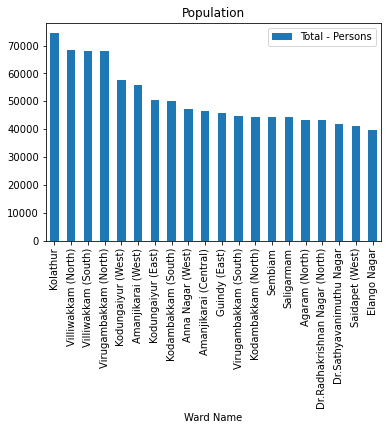

In [9]:
Pop_Ward_df.head(20).plot.bar(x="Ward Name", y="Total - Persons", rot=90, title="Population");

plt.show(block=True)

In [10]:
Target_Areas_df = pd.read_csv('GeoCoordinates.csv', index_col=0)  
Target_Areas_df.head()

,Latitude,Logitude
Neighborhood,,
Kolathur,13.1240°,80.2121°
Villivakkam,13.106741°,80.205638°
Amanjikarai,13.0711489,80.2482362


In [11]:
CLIENT_ID = 'NEFL5KMKMHNBHXXMBXJSMHW0E4UQGOC0MZNC3ZPN5XVH1D4W' 
CLIENT_SECRET = '2NCUE4UBYJJW30HVGLLR4GS4L2JRIL01DNOQJ05AHL2D5BRU' 
FS_HOSPITAL_KEY = "4bf58dd8d48988d196941735"
VERSION = '20200605'

In [12]:
radius=5000
LIMIT=100
lat = 13.116978
lng = 80.212611
search_query = ''
categoryId = '4bf58dd8d48988d104941735'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT, categoryId)

results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5eeb7f069c6f59001bcfa29e'},
 'response': {'venues': [{'id': '59ca65adefa82a02ce79eae2',
    'name': 'Parms Laboratory',
    'location': {'lat': 13.104899,
     'lng': 80.207886,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.104899,
       'lng': 80.207886}],
     'distance': 1438,
     'postalCode': '600049',
     'cc': 'IN',
     'city': 'Chennai',
     'state': 'Tamil Nadu',
     'country': 'India',
     'formattedAddress': ['Chennai 600049', 'Tamil Nadu', 'India']},
    'categories': [{'id': '4f4531b14b9074f6e4fb0103',
      'name': 'Medical Lab',
      'pluralName': 'Medical Labs',
      'shortName': 'Medical Lab',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/lab_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1592491979',
    'hasPerk': False},
   {'id': '4cccf3d8ba79a1cdf6c83ecb',
    'name': 'Madras Medical Mission (MMM Hospital)',
    'location': {'address': '4-A, Dr. J

In [13]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe

e:\python\miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet
0,59ca65adefa82a02ce79eae2,Parms Laboratory,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",v-1592491979,False,13.104899,80.207886,"[{'label': 'display', 'lat': 13.104899, 'lng':...",1438,600049,IN,Chennai,Tamil Nadu,India,"[Chennai 600049, Tamil Nadu, India]",NaN,NaN
1,4cccf3d8ba79a1cdf6c83ecb,Madras Medical Mission (MMM Hospital),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1592491979,False,13.085986,80.187398,"[{'label': 'display', 'lat': 13.08598577011605...",4401,600037,IN,Chennai,Tamil Nadu,India,"[4-A, Dr. J. Jayalalitha Nagar, (Mogappair), C...","4-A, Dr. J. Jayalalitha Nagar,",Mogappair
2,4f0fb69ee4b0fd294caae5a3,MaxiVision Eye Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1592491979,False,13.092917,80.218327,"[{'label': 'display', 'lat': 13.09291696556728...",2749,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN
3,5a137cbd73fe257fba106bf3,Damien Foundation India,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1592491979,False,13.072126,80.201814,"[{'label': 'display', 'lat': 13.072126, 'lng':...",5128,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN
4,517a9526e4b05e343886b584,The Clinic,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",v-1592491979,False,13.095932,80.236916,"[{'label': 'display', 'lat': 13.09593200683593...",3525,NaN,IN,NaN,NaN,India,[India],NaN,NaN
5,50da89f3e4b0afbc2ff1d881,male surgical Ward,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",v-1592491979,False,13.100326,80.213989,"[{'label': 'display', 'lat': 13.10032558441162...",1859,NaN,IN,NaN,NaN,India,[India],NaN,NaN
6,4eb7310429c212fb6d29d569,Aarthi Diagonostoc Center,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1592491979,False,13.091877,80.213199,"[{'label': 'display', 'lat': 13.091877, 'lng':...",2794,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN
7,4d92d589b189721e0d5a2a2a,Vasan Eye Care Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1592491979,False,13.093103,80.218377,"[{'label': 'display', 'lat': 13.09310325548525...",2730,600102,IN,Chennai,Tamil Nadu,India,"[M-77 3rd Avenue (Anna Nagar East), Chennai 60...",M-77 3rd Avenue,Anna Nagar East
8,510fc0f2e4b0f110169c89f3,Sharma Dental Clinic,"[{'id': '4bf58dd8d48988d178941735', 'name': 'D...",v-1592491979,False,13.083160,80.179796,"[{'label': 'display', 'lat': 13.08316, 'lng': ...",5179,NaN,IN,NaN,NaN,India,[India],NaN,NaN
9,4e74272d62e1263515d4a429,N S Speciality Clinic,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1592491979,False,13.085330,80.179684,"[{'label': 'display', 'lat': 13.08533, 'lng': ...",5015,600037,IN,Chennai,Tamil Nadu,India,"[#2, Perumal Nagar (Mogappair), Chennai 600037...","#2, Perumal Nagar",Mogappair


In [14]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Parms Laboratory,Medical Lab,13.104899,80.207886,"[{'label': 'display', 'lat': 13.104899, 'lng':...",1438,600049,IN,Chennai,Tamil Nadu,India,"[Chennai 600049, Tamil Nadu, India]",NaN,NaN,59ca65adefa82a02ce79eae2
1,Madras Medical Mission (MMM Hospital),Hospital,13.085986,80.187398,"[{'label': 'display', 'lat': 13.08598577011605...",4401,600037,IN,Chennai,Tamil Nadu,India,"[4-A, Dr. J. Jayalalitha Nagar, (Mogappair), C...","4-A, Dr. J. Jayalalitha Nagar,",Mogappair,4cccf3d8ba79a1cdf6c83ecb
2,MaxiVision Eye Hospital,Hospital,13.092917,80.218327,"[{'label': 'display', 'lat': 13.09291696556728...",2749,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN,4f0fb69ee4b0fd294caae5a3
3,Damien Foundation India,Hospital,13.072126,80.201814,"[{'label': 'display', 'lat': 13.072126, 'lng':...",5128,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN,5a137cbd73fe257fba106bf3
4,The Clinic,Dentist's Office,13.095932,80.236916,"[{'label': 'display', 'lat': 13.09593200683593...",3525,NaN,IN,NaN,NaN,India,[India],NaN,NaN,517a9526e4b05e343886b584
5,male surgical Ward,Emergency Room,13.100326,80.213989,"[{'label': 'display', 'lat': 13.10032558441162...",1859,NaN,IN,NaN,NaN,India,[India],NaN,NaN,50da89f3e4b0afbc2ff1d881
6,Aarthi Diagonostoc Center,Medical Center,13.091877,80.213199,"[{'label': 'display', 'lat': 13.091877, 'lng':...",2794,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN,4eb7310429c212fb6d29d569
7,Vasan Eye Care Hospital,Hospital,13.093103,80.218377,"[{'label': 'display', 'lat': 13.09310325548525...",2730,600102,IN,Chennai,Tamil Nadu,India,"[M-77 3rd Avenue (Anna Nagar East), Chennai 60...",M-77 3rd Avenue,Anna Nagar East,4d92d589b189721e0d5a2a2a
8,Sharma Dental Clinic,Dentist's Office,13.083160,80.179796,"[{'label': 'display', 'lat': 13.08316, 'lng': ...",5179,NaN,IN,NaN,NaN,India,[India],NaN,NaN,510fc0f2e4b0f110169c89f3
9,N S Speciality Clinic,Doctor's Office,13.085330,80.179684,"[{'label': 'display', 'lat': 13.08533, 'lng': ...",5015,600037,IN,Chennai,Tamil Nadu,India,"[#2, Perumal Nagar (Mogappair), Chennai 600037...","#2, Perumal Nagar",Mogappair,4e74272d62e1263515d4a429


In [15]:
dataframe_filtered.sort_values(by=['distance'], inplace=True)
dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Parms Laboratory,Medical Lab,13.104899,80.207886,"[{'label': 'display', 'lat': 13.104899, 'lng':...",1438,600049,IN,Chennai,Tamil Nadu,India,"[Chennai 600049, Tamil Nadu, India]",NaN,NaN,59ca65adefa82a02ce79eae2
5,male surgical Ward,Emergency Room,13.100326,80.213989,"[{'label': 'display', 'lat': 13.10032558441162...",1859,NaN,IN,NaN,NaN,India,[India],NaN,NaN,50da89f3e4b0afbc2ff1d881
7,Vasan Eye Care Hospital,Hospital,13.093103,80.218377,"[{'label': 'display', 'lat': 13.09310325548525...",2730,600102,IN,Chennai,Tamil Nadu,India,"[M-77 3rd Avenue (Anna Nagar East), Chennai 60...",M-77 3rd Avenue,Anna Nagar East,4d92d589b189721e0d5a2a2a
2,MaxiVision Eye Hospital,Hospital,13.092917,80.218327,"[{'label': 'display', 'lat': 13.09291696556728...",2749,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN,4f0fb69ee4b0fd294caae5a3
47,Sarayu family medical center,Hospital,13.092287,80.216690,"[{'label': 'display', 'lat': 13.09228706359863...",2783,NaN,IN,NaN,NaN,India,[India],NaN,NaN,5162ca07e4b0b401f3145f73
6,Aarthi Diagonostoc Center,Medical Center,13.091877,80.213199,"[{'label': 'display', 'lat': 13.091877, 'lng':...",2794,NaN,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN,4eb7310429c212fb6d29d569
10,Shankar's Dental Clinic,Dentist's Office,13.091241,80.215906,"[{'label': 'display', 'lat': 13.091241, 'lng':...",2887,600040,IN,Chennai,Tamil Nadu,India,"[Q-48 Roundtana (15th Street Anna Nagar), Chen...",Q-48 Roundtana,15th Street Anna Nagar,503b9080e4b06e9ad578fbc4
31,Southern Railway Headquarters Hospital,Hospital,13.104186,80.239308,"[{'label': 'display', 'lat': 13.104186, 'lng':...",3225,600049,IN,Perambur,Tamil Nadu,India,"[Perambur 600049, Tamil Nadu, India]",NaN,NaN,5a7adc9ad1a4022b3cecbd06
13,Mohan Easow Clinic,Doctor's Office,13.088394,80.218129,"[{'label': 'display', 'lat': 13.088394, 'lng':...",3237,NaN,IN,NaN,NaN,India,[India],NaN,NaN,4d92a47614228cfa3245517b
41,Vihaa - Multi-Speciality Hospital,Hospital,13.087795,80.218368,"[{'label': 'display', 'lat': 13.087795, 'lng':...",3308,600102,IN,Chennai,Tamil Nadu,India,"[3rd Avenue, Anna Nagar East,, Chennai 600102,...","3rd Avenue, Anna Nagar East,",NaN,58e10e3f9343e033b0ffb3e8


In [16]:
dataframe_filtered1=dataframe_filtered[['name','categories','distance','lat','lng']]
dataframe_filtered1

,name,categories,distance,lat,lng
0,Parms Laboratory,Medical Lab,1438,13.104899,80.207886
5,male surgical Ward,Emergency Room,1859,13.100326,80.213989
7,Vasan Eye Care Hospital,Hospital,2730,13.093103,80.218377
2,MaxiVision Eye Hospital,Hospital,2749,13.092917,80.218327
47,Sarayu family medical center,Hospital,2783,13.092287,80.216690
6,Aarthi Diagonostoc Center,Medical Center,2794,13.091877,80.213199
10,Shankar's Dental Clinic,Dentist's Office,2887,13.091241,80.215906
31,Southern Railway Headquarters Hospital,Hospital,3225,13.104186,80.239308
13,Mohan Easow Clinic,Doctor's Office,3237,13.088394,80.218129
41,Vihaa - Multi-Speciality Hospital,Hospital,3308,13.087795,80.218368


In [17]:
df1=dataframe_filtered1.groupby('categories').count()
df1

,name,distance,lat,lng
categories,,,,
Dentist's Office,6,6,6,6
Doctor's Office,5,5,5,5
Emergency Room,1,1,1,1
Hospital,24,24,24,24
Medical Center,10,10,10,10
Medical Lab,3,3,3,3


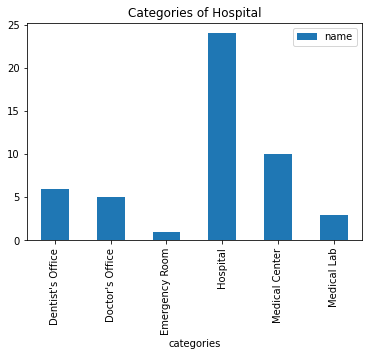

In [18]:
df1.plot.bar(y='name', title="Categories of Hospital" )
plt.show(block=True)

In [19]:
dataframe_filtered1 = dataframe_filtered1[dataframe_filtered1['categories'] == "Hospital"]
dataframe_filtered1
dataframe_filtered2 = dataframe_filtered1.iloc[0:9]
dataframe_filtered3 = dataframe_filtered1.iloc[10:]

In [20]:
venues_map = folium.Map(location=[lat, lng], zoom_start=13)

# add a red circle marker to represent the Amanjikarai
folium.CircleMarker(
    [lat, lng],
    radius=10,
    color='red',
    popup='Kolathur',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered3.lat, dataframe_filtered3.lng, dataframe_filtered3.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map